In [35]:
%matplotlib inline
%gui

In [6]:
import chainer
from chainer import serializers
import matplotlib.pyplot as plt

In [109]:
import net, data
import importlib
importlib.reload(net)

<module 'net' from '/Users/quolc/pathology/deep/chainer-examples/mnist-convolutional-autoencoder/net.py'>

In [126]:
model = net.Regression(net.AutoEncoder(28, 8, 25, 5, 'relu'))

In [127]:
#serializers.load_npz('./relu_5x8filters_1000hidden_epoch200_noise0.model', model)
serializers.load_npz('./relu_5x8filters_25hidden_epoch100_alpha1e-05_noise0.model', model)

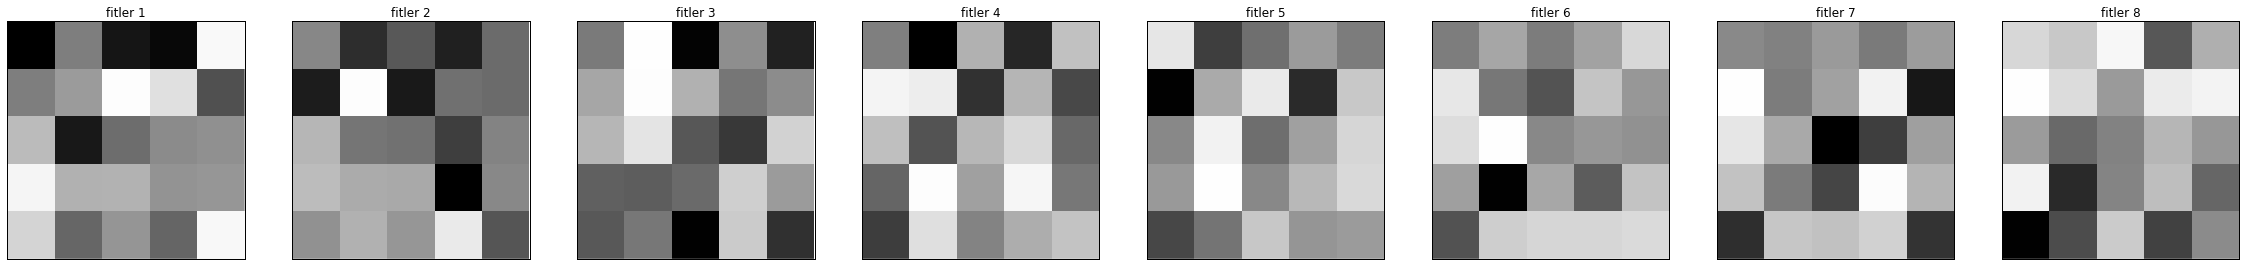

In [128]:
# フィルタの重み可視化
n_filters = model.predictor.n_filters
filter_size = model.predictor.filter_size
fig, axes = plt.subplots(1, n_filters, figsize=(filter_size*n_filters, filter_size))
for i in range(n_filters):
    f = model.predictor.conv1.W.data[i]
    axes[i].set_xticks([]); axes[i].set_yticks([])
    axes[i].set_title('fitler ' + str(i+1))
    axes[i].imshow(f.reshape((filter_size, filter_size)), cmap=cm.Greys_r, interpolation='none')

In [90]:
# MNISTデータ読み込み
mnist = data.load_mnist_data()
mnist['data'] = mnist['data'].astype(np.float32)
mnist['data'] /= 255
x_train, x_test = np.split(mnist['data'], [data.num_train])
x_train = x_train.reshape((len(x_train), 1, 28, 28))
x_test = x_test.reshape((len(x_test), 1, 28, 28))

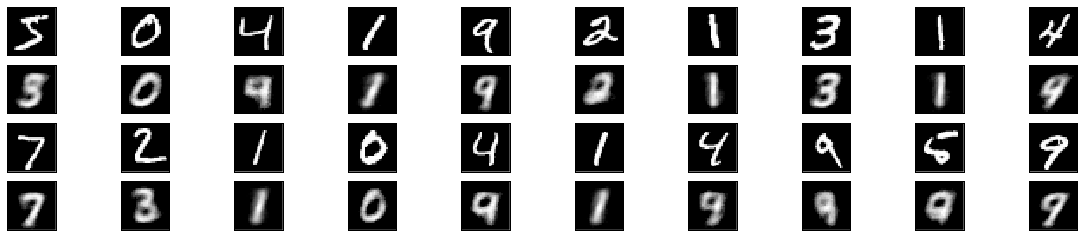

In [129]:
data = x_train[0:10]
var = chainer.Variable(data)
recon = model.predictor(var, train=False) # 復元処理の実行

data_test = x_test[0:10]
var_test = chainer.Variable(data_test)
recon_test = model.predictor(var_test, train=False)

# 表示
fig, axes = plt.subplots(4, 10, figsize=(20,4))
for i in range(0, 10):
    axes[0,i].set_xticks([]); axes[0,i].set_yticks([])
    axes[1,i].set_xticks([]); axes[1,i].set_yticks([])
    axes[0,i].imshow(data[i].reshape((28, 28)), cmap=cm.Greys_r, interpolation='none')
    axes[1,i].imshow(recon.data[i].reshape((28, 28)),  cmap=cm.Greys_r, interpolation='none')
    
    axes[2,i].set_xticks([]); axes[2,i].set_yticks([])
    axes[3,i].set_xticks([]); axes[3,i].set_yticks([])
    axes[2,i].imshow(data_test[i].reshape((28, 28)), cmap=cm.Greys_r, interpolation='none')
    axes[3,i].imshow(recon_test.data[i].reshape((28, 28)),  cmap=cm.Greys_r, interpolation='none')

In [157]:
import chainer.functions as F
a = chainer.Variable(np.array([[[[1,0,0],[0,1,0],[0,0,1]]], [[[0,0,1],[0,1,0],[1,0,0]]]], dtype='float32'))
F.unpooling_2d(a, ksize=3,pad=0,outsize=(9,9)).data

array([[[[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]]],


       [[[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,